In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df_A = pd.read_csv("Datasets\df_A.csv")
df_B = pd.read_csv("Datasets\df_B.csv")

In [75]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

In [76]:
# List of DataFrame names for location_B
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

# Dictionary to store the imported DataFrames
location_B = {}

# Load each CSV file into a DataFrame
for df_name in df_names_B:
    csv_filename = f"Datasets\{df_name}.csv"
    location_B[df_name] = pd.read_csv(csv_filename)

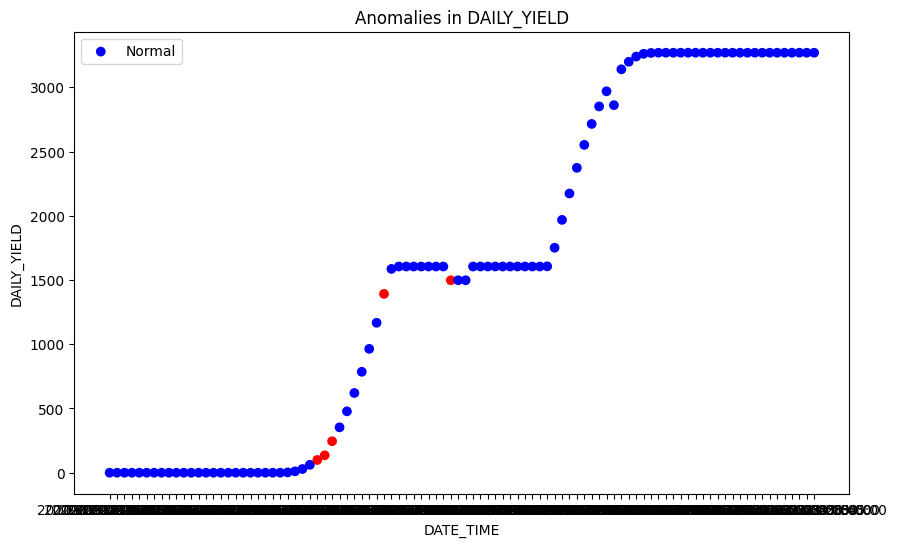

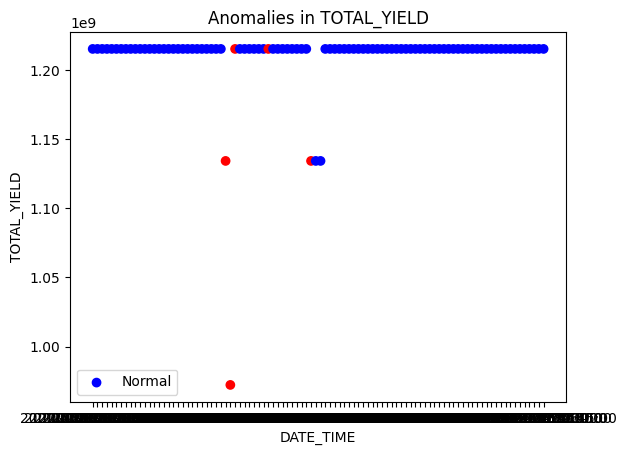

In [115]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in a DataFrame named `df`)
# If not already loaded, use: df = pd.read_csv('your_file.csv')

# Select relevant features for anomaly detection
features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
            'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'TOTAL_YIELD_diff', 'DAILY_YIELD_diff']

df = location_B['B6_df'].copy()

df = df[(df['DATE'] == '2020-05-22')]

# Prepare the data
data = df[features].fillna(0)  # Fill missing values with 0
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Scale the data for better performance

# Initialize and fit the IsolationForest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = isolation_forest.fit_predict(data_scaled)

# Label anomalies (anomaly_score = -1 indicates an anomaly, 1 indicates normal)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']

# Save the anomalies to a CSV
# anomalies.to_csv('anomalies.csv', index=False)

# Optional: Visualize anomalies (e.g., Daily Yield vs. Time)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['DATE_TIME'], df['DAILY_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('DAILY_YIELD')
plt.title('Anomalies in DAILY_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

plt.scatter(df['DATE_TIME'], df['TOTAL_YIELD'], label='Normal', c=df['is_anomaly'].apply(lambda x: 'blue' if x == 'Normal' else 'red'))
plt.xlabel('DATE_TIME')
plt.ylabel('TOTAL_YIELD')
plt.title('Anomalies in TOTAL_YIELD')
plt.legend(['Normal', 'Anomaly'])
plt.show()

In [105]:
# Filter for anomalies
anomalies = df[df['is_anomaly'] == 'Anomaly']
anomalies

,DATE_TIME,DATE,TIME,DC_POWER,AC_POWER,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,anomaly_score,is_anomaly
698,2020-05-22 07:00:00,2020-05-22,07:00:00,183.433333,179.813333,99.266667,37.600000,1.134294e+09,-8.102095e+07,24.837042,26.701680,0.152234,-1,Anomaly
699,2020-05-22 07:15:00,2020-05-22,07:15:00,233.473333,229.246667,135.733333,36.466667,9.722520e+08,-1.620419e+08,25.161568,28.027382,0.223516,-1,Anomaly
707,2020-05-22 09:15:00,2020-05-22,09:15:00,953.100000,932.166667,1391.800000,224.666667,1.215316e+09,2.246667e+02,29.241733,47.507955,0.713910,-1,Anomaly
716,2020-05-22 11:30:00,2020-05-22,11:30:00,0.000000,0.000000,1498.000000,-107.000000,1.134295e+09,-8.102110e+07,32.779252,59.337008,0.955250,-1,Anomaly
730,2020-05-22 15:00:00,2020-05-22,15:00:00,941.426667,920.786667,1751.200000,144.733333,1.215317e+09,1.447333e+02,36.203580,57.102826,0.663904,-1,Anomaly


In [78]:
model_data = location_B['B6_df'][['TOTAL_YIELD_diff', 'DAILY_YIELD_diff', 'AC_POWER', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'DATE_TIME']].set_index('DATE_TIME').dropna()
model_data

,TOTAL_YIELD_diff,DAILY_YIELD_diff,AC_POWER,IRRADIATION,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE
DATE_TIME,,,,,,
2020-05-15 00:15:00,0.0,0.0,0.0,0.0,26.880811,24.421869
2020-05-15 00:30:00,0.0,0.0,0.0,0.0,26.682055,24.427290
2020-05-15 00:45:00,0.0,0.0,0.0,0.0,26.500589,24.420678
2020-05-15 01:00:00,0.0,0.0,0.0,0.0,26.596148,25.088210
2020-05-15 01:15:00,0.0,0.0,0.0,0.0,26.512740,25.317970
...,...,...,...,...,...,...
2020-06-17 22:45:00,0.0,0.0,0.0,0.0,23.511703,22.856201
2020-06-17 23:00:00,0.0,0.0,0.0,0.0,23.482282,22.744190
2020-06-17 23:15:00,0.0,0.0,0.0,0.0,23.354743,22.492245


In [79]:
from sklearn.ensemble import IsolationForest

def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )
    
    IF.fit(model_data)
    
    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
    score = IF.decision_function(model_data)
    
    return output, score

In [80]:
outliers, score = run_isolation_forest(model_data)

In [81]:
result = (model_data
             .assign(Outliers = outliers)
             .assign(Score = score)
            ).copy()

In [82]:
result

,TOTAL_YIELD_diff,DAILY_YIELD_diff,AC_POWER,IRRADIATION,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,Outliers,Score
DATE_TIME,,,,,,,,
2020-05-15 00:15:00,0.0,0.0,0.0,0.0,26.880811,24.421869,NaN,0.322304
2020-05-15 00:30:00,0.0,0.0,0.0,0.0,26.682055,24.427290,NaN,0.324634
2020-05-15 00:45:00,0.0,0.0,0.0,0.0,26.500589,24.420678,NaN,0.325001
2020-05-15 01:00:00,0.0,0.0,0.0,0.0,26.596148,25.088210,NaN,0.324603
2020-05-15 01:15:00,0.0,0.0,0.0,0.0,26.512740,25.317970,NaN,0.325129
...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,0.0,0.0,0.0,0.0,23.511703,22.856201,NaN,0.326231
2020-06-17 23:00:00,0.0,0.0,0.0,0.0,23.482282,22.744190,NaN,0.325274
2020-06-17 23:15:00,0.0,0.0,0.0,0.0,23.354743,22.492245,NaN,0.324655


In [83]:
len(result.query("Outliers == 1"))

0

In [84]:
IF = IsolationForest(random_state=0, contamination=0.005, n_estimators=200, max_samples=0.7)
IF.fit(model_data)

# New Outliers Column
result['Outliers'] = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)

# Get Anomaly Score
score = IF.decision_function(model_data)

# New Anomaly Score column
result['Score'] = score

In [85]:
result

,TOTAL_YIELD_diff,DAILY_YIELD_diff,AC_POWER,IRRADIATION,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,Outliers,Score
DATE_TIME,,,,,,,,
2020-05-15 00:15:00,0.0,0.0,0.0,0.0,26.880811,24.421869,NaN,0.322304
2020-05-15 00:30:00,0.0,0.0,0.0,0.0,26.682055,24.427290,NaN,0.324634
2020-05-15 00:45:00,0.0,0.0,0.0,0.0,26.500589,24.420678,NaN,0.325001
2020-05-15 01:00:00,0.0,0.0,0.0,0.0,26.596148,25.088210,NaN,0.324603
2020-05-15 01:15:00,0.0,0.0,0.0,0.0,26.512740,25.317970,NaN,0.325129
...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,0.0,0.0,0.0,0.0,23.511703,22.856201,NaN,0.326231
2020-06-17 23:00:00,0.0,0.0,0.0,0.0,23.482282,22.744190,NaN,0.325274
2020-06-17 23:15:00,0.0,0.0,0.0,0.0,23.354743,22.492245,NaN,0.324655


In [86]:
len(result.query("Outliers == 1"))

0